# Welcome to PyCO2SYS!

***If you're totally new to PyCO2SYS, this is the right place to be!***

If you're also new to Python, you should still be able to follow what's going on here and understand how to make some changes to the code - but this is not intended as a Python tutorial.

We will work through a series of examples of PyCO2SYS calculations, starting with the most basic and gradually building up the complexity.

> **How does this work?**
> 
> This is a [Jupyter notebook](https://realpython.com/jupyter-notebook-introduction/).  If you're viewing this [through Binder](https://mybinder.org/v2/gh/mvdh7/PyCO2SYS-examples/master), then Python is running live in your web browser!
>
> You can run the different sections of code below by clicking on them with your mouse.  The selected code section gets outlined by a box with a thick green or blue bar down the left-hand side.  Then either click the Run button at the top or press ctrl+enter on your keyboard to run the selected section.
>
> To the upper left of each code section you will see `In [ ]:`.  An asterisk (`*`) appears between the brackets while the code is running, which changes to a number once each section of code has successfully run.  Once it has been run (but not before!), the results calculated in one code section can be used in any other.  **Some sections do rely on earlier ones having been run, so make sure you run them all in sequence!**
>
> You can edit the code freely and run it again to see what happens.  Don't worry, your changes are only local, so they won't affect anyone else.  If you close the notebook and start it up again it will all be reset (unless you've downloaded this and are running it on your own Jupyter server).

## Import CO2SYS

Before we can use any package like PyCO2SYS in Python we must import it.  This is very simple to do, using the following convention.  Not much appears to happen, but check that a number appears in the brackets at the top left (e.g. `In [1]:`):

In [1]:
import PyCO2SYS as pyco2

## Solve the marine carbonate system!

Now that we've imported PyCO2SYS, we can define some seawater conditions and solve the marine carbonate system from them.

Imagine we measured the pH and dissolved inorganic carbon (DIC) of a seawater sample in the lab at 25 °C.  The sample was collected from a seawater pressure of 5 dbar (roughly 5 m depth - pressure excludes atmospheric pressure) and it had a temperature of 10 °C there.  We want to know what the saturation state of aragonite was *in situ* when and where the sample was collected.

The lab environment sets the "input conditions" for PyCO2SYS's arguments and results (i.e. temperature = 25 °C, pressure = 0), while the in situ environment sets the "output conditions" (i.e. temperature = 10 °C, pressure = 100 dbar).

> For more information on the arguments and results below please consult the [online docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/).
>
> You can also find the [full citations](https://pyco2sys.readthedocs.io/en/latest/refs/) for the abbreviated references (e.g. `LDK00`) mentioned in the code.

In [2]:
# Everything on a line after a # symbol is just a comment!

# Define the known marine carbonate system parameters
par1 = 8.05  # pH measured in the lab, Total scale
par2 = 2050  # DIC measured in the lab in μmol/kg-sw
par1_type = 3  # tell PyCO2SYS: "par1 is a pH value"
par2_type = 2  # tell PyCO2SYS: "par2 is a DIC value"

# Set up a dict for the keyword arguments, for convenience
pyco2_kws = {}

# Define the seawater conditions and add them to the dict
pyco2_kws["salinity"] = 35  # practical salinity
pyco2_kws["temperature"] = 25  # lab temperature (input conditions) in °C
pyco2_kws["temperature_out"] = 10  # in-situ temperature (output conditions) in °C
pyco2_kws["pressure"] = 0  # lab pressure (input conditions) in dbar, ignoring the atmosphere
pyco2_kws["pressure_out"] = 5  # in-situ pressure (output conditions) in dbar, ignoring the atmosphere
pyco2_kws["total_silicate"]  = 8.2  # total silicate in μmol/kg-sw
pyco2_kws["total_phosphate"] = 0.3  # total phosphate in μmol/kg-sw
pyco2_kws["total_ammonia"] = 0.1  # total ammonia in μmol/kg-sw
pyco2_kws["total_sulfide"] = 0.2  # total sulfide in μmol/kg-sw

# Define PyCO2SYS settings and add them to the dict
pyco2_kws["opt_pH_scale"] = 1  # tell PyCO2SYS: "the pH input is on the Total scale"
pyco2_kws["opt_k_carbonic"] = 10  # tell PyCO2SYS: "use carbonate equilibrium constants of LDK00"
pyco2_kws["opt_k_bisulfate"] = 1  # tell PyCO2SYS: "use bisulfate dissociation constant of D90a"
pyco2_kws["opt_total_borate"] = 1  # tell PyCO2SYS: "use borate:salinity of LKB10"

# Now calculate everything with PyCO2SYS!
results = pyco2.sys(par1, par2, par1_type, par2_type, **pyco2_kws)

# `results` contains all the different calculated seawater properties as a dict.
# Aragonite saturation state under the output conditions has the key "saturation_aragonite_out".
# Here we extract that result only and store it as `omega_arag_insitu`:
omega_arag_insitu = results["saturation_aragonite_out"]

# Now, tell us the answer!
print("The calculated result is:", omega_arag_insitu)

The calculated result is: 3.23984172794113


If all went well then you should see the aragonite saturation state (about 3.2 for the example values used) printed out directly above here.

### Try changing the arguments

You can edit the code above and then re-run it to see the effect on the result.  Some things you might try:

  1.  Change the **seawater conditions** (any of `par1`, `par2`, `salinity`, `temperature`, `temperature_out`, `pressure`, `pressure_out`, `total_silicate`, `total_phosphate`, `total_ammonia` and `total_sulfide`).
  
  2.  Change the **equilibrium constants** used for the calculations (`opt_k_carbonic`, `opt_k_bisulfate` and `opt_total_borate`; see the [settings docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#settings) for your options).
  
  3.  Change the **pH scale** that the input pH is declared as being on (`opt_pH_scale`; see the [settings docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#settings)).
  
  4.  Change the input pair of **marine carbonate system parameters** (`par1` and `par1_type` and/or `par2` and `par2_type`; see the [carbonate system parameters docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/#carbonate-system-parameters)).
  
  5.  Change the **results variable** that is printed out (change `"saturation_aragonite_out"` to something different; see the [results docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#results)).

## Calculations with arrays

PyCO2SYS doesn't have to process one calculation at a time - it is optimised to run calculations over many different solution compositions at the same time.

> In the example below, only one of the arguments is an array, while the others are all single values.
>
> But every single input variable given to PyCO2SYS can be provided either as an array, or as a single value, in any combination - including those controlling the [settings](https://pyco2sys.readthedocs.io/en/latest/co2sys/#settings).
>
> Arrays should be [NumPy ndarrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html?highlight=ndarray#numpy.ndarray) but they can have as many dimensions as you like, in any combination that is compatible for NumPy broadcasting.  Results that depend only on scalar arguments are also scalar.  Results that depend on non-scalar arguments will all be in the shape of all arguments fully broadcasted together.

### Effect of increasing <i>p</i>CO<sub>2</sub>

Let's continue from the example above and see how increasing seawater <i>p</i>CO<sub>2</sub> alone would change the saturation state of aragonite for that sample, assuming that total alkalinity remains constant.

#### Get starting conditions

We'll use the same seawater conditions and PyCO2SYS settings as we defined previously, so we don't need to write those out again.  But we will redefine the marine carbonate system, starting from the total alkalinity and seawater <i>p</i>CO<sub>2</sub> that we calculated above as part of `results`.

In [3]:
# Get total alkalinity and initial seawater pCO2
TAlk = results["alkalinity"]
pCO2_now = results["pCO2_out"]

# See what they are!
print("Total alkalinity is: {:.1f} μmol/kg-sw".format(TAlk))
print("Initial seawater pCO2 is: {:.1f} μatm".format(pCO2_now))

Total alkalinity is: 2358.7 μmol/kg-sw
Initial seawater pCO2 is: 214.8 μatm


#### Generate array of increasing <i>p</i>CO<sub>2</sub> values

We can use a tool from the Python package [NumPy](https://numpy.org/doc/stable/) to conveniently generate an array of increasing seawater <i>p</i>CO<sub>2</sub> values:

In [4]:
import numpy as np  # now we have access to NumPy's tools

pCO2_end = 1000  # maximum pCO2 value to go to in μatm
n_steps = 20  # number of regularly-spaced values to make from `pCO2_now` to `pCO2_end`
pCO2_increasing = np.linspace(pCO2_now, pCO2_end, n_steps)  # generate the array of pCO2 values

print("Increasing pCO2 values in μatm:")
print(pCO2_increasing)

Increasing pCO2 values in μatm:
[ 214.79395387  256.12058788  297.44722189  338.77385589  380.1004899
  421.42712391  462.75375791  504.08039192  545.40702593  586.73365993
  628.06029394  669.38692795  710.71356195  752.04019596  793.36682997
  834.69346397  876.02009798  917.34673199  958.67336599 1000.        ]


#### Solve the marine carbonate system

Now, we can simply pass in this array as one of the inputs to PyCO2SYS along with `TAlk` and the other values that we defined before.  We also need to:

  * Update the `par1_type` and `par2_type` inputs to `1` for total alkalinity and `4` for seawater <i>p</i>CO<sub>2</sub> (see the [input docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#carbonate-system-parameters)).
  
  * Use `temperature_out` and `pressure_out` as the \"input\" conditions (i.e. `temperature` and `pressure`).  This is because the <i>p</i>CO<sub>2</sub> we're now using as our input was calculated at the "output" conditions of the original calculation (i.e. in situ).  When we do calculations entirely using in situ values, then there's no distinction between "input" and "output" conditions.

We access the calculated results in exactly the same way, but now they are all either scalar or arrays of the same size as `pCO2_increasing`:

In [5]:
# Copy original kwargs dict
import copy
pyco2_kws_response = copy.deepcopy(pyco2_kws)

# Copy original output temperature and pressure as new input conditions
pyco2_kws_response["temperature"] = pyco2_kws["temperature_out"]
pyco2_kws_response["pressure"] = pyco2_kws["pressure_out"]

# Remove now-unnecessary output conditions (optional)
pyco2_kws_response.pop("temperature_out")
pyco2_kws_response.pop("pressure_out")

# Solve the marine carbonate system with increasing seawater pCO2
results_response = pyco2.sys(TAlk, pCO2_increasing, 1, 4, **pyco2_kws_response)

# See how aragonite saturation state changes
omega_arag_response = results_response["saturation_aragonite"]
print("Aragonite saturation state response to increasing seawater pCO2:")
print(omega_arag_response)

Aragonite saturation state response to increasing seawater pCO2:
[3.23984173 2.89010613 2.61087189 2.38225023 2.1913333  2.02933287
 1.89003607 1.76891481 1.66258458 1.56846121 1.48453529 1.40921945
 1.34124222 1.2795726  1.22336541 1.17192096 1.12465488 1.08107516
 1.04076449 1.00336659]


#### Make a figure of the results

The Python package [Matplotlib](https://matplotlib.org/) can help us visualise this result:

<IPython.core.display.Javascript object>


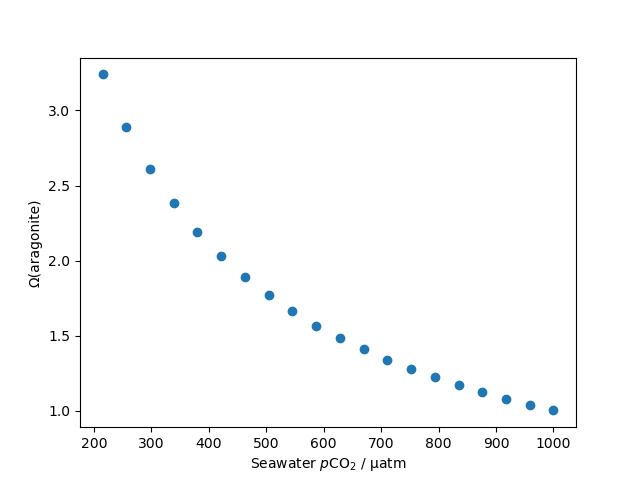

Text(0, 0.5, 'Ω(aragonite)')

In [6]:
from matplotlib import pyplot as plt  # now we can use Matplotlib's plotting tools
# Make the figures interactive:
%matplotlib notebook

# Draw a very basic plot
fig, ax = plt.subplots()
ax.scatter(pCO2_increasing, omega_arag_response)
ax.set_xlabel('Seawater $p$CO$_2$ / μatm')
ax.set_ylabel('Ω(aragonite)')